In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from rdkit import Chem 
from rdkit.Chem import rdFingerprintGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score,f1_score
import joblib

### Loading Data
Your data should be loaded as .csv file containing such features as "Chemble_id", "Smiles", "Bioactivity class" (1 for active, 0 for inactive ligands).



In [4]:
data_train = pd.read_csv('data_train.csv')
data_train.head()

,molecule_chembl_id,Smiles,pIC50,bioactivity_class
0,CHEMBL3404003,COCCCOc1cc(C(=O)N(C[C@@H]2CNC[C@H]2OC(=O)N(C)C...,7.523,1
1,CHEMBL3403999,COCCCOc1cc(C(=O)N(C[C@@H]2CNC[C@H]2OC(=O)NCc2c...,7.046,1
2,CHEMBL4109808,COCCCOc1ccc([C@@H](C)N(C(=O)[C@H]2CNCCO2)C2CC2...,7.469,1
3,CHEMBL557193,CCCCNC(=O)[C@H](C)C[C@H](O)[C@@H](N)C[C@H](Cc1...,9.000,1
4,CHEMBL4114302,COC(=O)NCCCn1nc([C@@H](C)N(C(=O)[C@H]2CNCCO2)C...,8.444,1


### Creating np.array from bioactivity classes of your ligands

In [5]:
bioactivity = data_train[['bioactivity_class']]
bioactivity = np.array(bioactivity)
bioactivity = bioactivity.flatten()

### Creating np.array from fingerprints of your ligands

In [6]:
compounds = []
for _, chembl_id, smile in data_train[['molecule_chembl_id', 'Smiles']].itertuples():
    compounds.append((Chem.MolFromSmiles(smile), chembl_id))
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, indx in compounds]
fingerprints = np.array(fingerprints)

### Spliting database into train and test datasets
You can change test_size parameter, if you want your test dataset to be bigger or smaller.

In [8]:
fingerprints_train, fingerprints_test, bioactivity_train, bioactivity_test = train_test_split(fingerprints, bioactivity, test_size = 0.3)

### Creating RandomForestClassifier
This step creates random forest classifier using GridSearchCV or RandomizedSearchCV (you can choose how to search optimal parameters). You can change search hyperparameters if you want to. 

In [31]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators' : range(10,50), 
              'max_depth' : range(3,200), 'min_samples_split' : range(3,20)}
randomized_search_cv_clf_rf = RandomizedSearchCV(clf_rf, parameters, cv=5)

In [ ]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators' : range(10,20), 
              'max_depth' : range(3,30), 'min_samples_split' : range(5,30)}
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

### Fitting your data into model

In [32]:
randomized_search_cv_clf_rf.fit(fingerprints_train, bioactivity_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(3, 200),
                                        'min_samples_split': range(3, 20),
                                        'n_estimators': range(10, 50)})

In [ ]:
grid_search_cv_clf_rf.fit(fingerprints_train, bioactivity_train)

### Saving best model

In [33]:
best_model = randomized_search_cv_clf_rf.best_estimator_

In [ ]:
best_model = grid_search_cv_clf_rf.best_estimator_

### Getting model metrics for test dataset

In [34]:
accuracy = best_model.score(fingerprints_test, bioactivity_test)
bioactivity_test_predicted = best_model.predict(fingerprints_test)
precision = precision_score(bioactivity_test, bioactivity_test_predicted)
recall = recall_score(bioactivity_test, bioactivity_test_predicted)
f1score = f1_score(bioactivity_test, bioactivity_test_predicted)
print('Accuracy: {0} \nPrecision score: {1} \nRecall score: {2} \nF1-score: {3}'\
          .format(accuracy, precision, recall, f1score))

Accuracy: 0.9269406392694064 
Precision score: 0.9397394136807817 
Recall score: 0.9812925170068028 
F1-score: 0.9600665557404325


### Confusion matrix

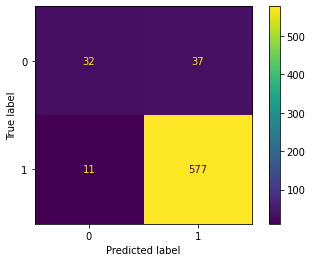

In [35]:
plot_confusion_matrix(best_model, fingerprints_test, bioactivity_test)

### Saving model to file

In [37]:
joblib.dump(best_model, 'best_model.sav')

['best_model.sav']